#KAN vs MLP in regression problem

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape[0] *0.8

1070.4

In [62]:


insurance['children'].isnull().sum(), insurance['smoker'].isnull().sum(), insurance['region'].isnull().sum(), insurance['charges'].isnull().sum()

(0, 0, 0, 0)

In [6]:
insurance["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [7]:
!pip install tensorflow

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.regularizers import l1, l2

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


oneHot = OneHotEncoder()
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

num = ["bmi"]
cat = ["sex", "smoker", "region"]

ct = ColumnTransformer([
    ("oneHot", oneHot, cat),
    ("scaler", scaler_X, num)
], remainder="passthrough")

X = insurance.drop("charges", axis=1)
y = insurance["charges"].values.reshape(-1, 1)


y = scaler_y.fit_transform(y)

X = ct.fit_transform(X)

X_t, X_test, y_t, y_test = X[:1200], X[1200:], y[:1200], y[1200:]

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)


print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

dataset = {
    'train_input': X_train,
    'train_label': y_train,
    'val_input': X_val,
    'val_label': y_val,
    'test_input': X_test,
    'test_label': y_test
}

for k, v in dataset.items():
    dataset[k] = torch.tensor(v, dtype=torch.float32).to("cpu")

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(dataset['train_input'].shape[1], 50)
        self.fc2 = nn.Linear(50, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


torch.manual_seed(42)


model_mlp = MLP().to("cpu")


optimizer = optim.Adam(model_mlp.parameters(), lr=0.01)
loss_fn = nn.L1Loss()

# Initialize lists to store the loss and MAE values
train_losses = []
val_maes = []

# Training loop
epochs = 500
for epoch in range(epochs):
    model_mlp.train()
    optimizer.zero_grad()
    outputs = model_mlp(dataset['train_input'])
    loss = loss_fn(outputs, dataset['train_label'].view(-1, 1))  # Ensure the labels have the right shape
    loss.backward()
    optimizer.step()


    train_losses.append(loss.item())
    model_mlp.eval()
    with torch.no_grad():
        val_outputs = model_mlp(dataset['val_input'])
        val_mae = loss_fn(val_outputs, dataset['val_label'].view(-1, 1))
        val_maes.append(val_mae.item())


model_mlp.eval()
with torch.no_grad():
    test_outputs = model_mlp(dataset['test_input'])
    test_mae = loss_fn(test_outputs, dataset['test_label'].view(-1, 1))


r2 = r2_score(dataset['test_label'].numpy(), test_outputs.numpy())

print(f"MAE for MLP on test set: {test_mae.item()}")
print(f"R² score: {r2}")




X_train shape: (960, 11), y_train shape: (960, 1)
X_val shape: (240, 11), y_val shape: (240, 1)
X_test shape: (138, 11), y_test shape: (138, 1)
MAE for MLP on test set: 0.05874984711408615
R² score: 0.72909301987174


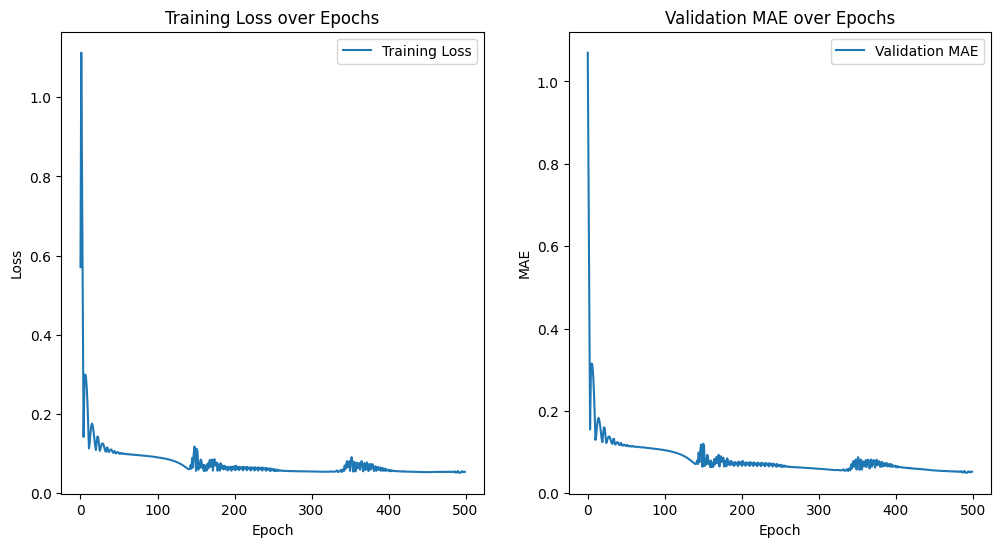

In [91]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_maes, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Validation MAE over Epochs')
plt.legend()

plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Sample DataFrame (assume 'insurance' is your DataFrame)
# insurance = pd.read_csv('insurance.csv')

# Define preprocessing steps
oneHot = OneHotEncoder()
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

num = ["bmi"]
cat = ["sex", "smoker", "region"]

ct = ColumnTransformer([
    ("oneHot", oneHot, cat),
    ("scaler", scaler_X, num)
], remainder="passthrough")

X = insurance.drop("charges", axis=1)
y = insurance["charges"].values.reshape(-1, 1)





X = ct.fit_transform(X)


X_t, X_test, y_t, y_test = X[:1200], X[1200:], y[:1200], y[1200:]

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

# Verify the shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (960, 11), y_train shape: (960, 1)
X_val shape: (240, 11), y_val shape: (240, 1)
X_test shape: (138, 11), y_test shape: (138, 1)


In [14]:
model_mlp.evaluate(X_val, y_val)


8/8 [==============================] - 1s 6ms/step - loss: 3397.5537 - mae: 3397.5537


[3397.5537109375, 3397.5537109375]

https://github.com/KindXiaoming/pykan/blob/master/tutorials/Example_1_function_fitting.ipynb

https://github.com/KindXiaoming/pykan/blob/master/README.md

https://www.kaggle.com/code/seyidcemkarakas/kan-regression-graduate-admissions

https://colab.research.google.com/drive/1pBdMgmIcBM-oN4Cv1yR8V0a64T4LydTe?usp=sharing#scrollTo=p3FJ0TRSPepr

In [19]:
!!git clone https://github.com/KindXiaoming/pykan.git




["Cloning into 'pykan'...",
 'remote: Enumerating objects: 2946, done.\x1b[K',
 'remote: Counting objects:   0% (1/512)\x1b[K',
 'remote: Counting objects:   1% (6/512)\x1b[K',
 'remote: Counting objects:   2% (11/512)\x1b[K',
 'remote: Counting objects:   3% (16/512)\x1b[K',
 'remote: Counting objects:   4% (21/512)\x1b[K',
 'remote: Counting objects:   5% (26/512)\x1b[K',
 'remote: Counting objects:   6% (31/512)\x1b[K',
 'remote: Counting objects:   7% (36/512)\x1b[K',
 'remote: Counting objects:   8% (41/512)\x1b[K',
 'remote: Counting objects:   9% (47/512)\x1b[K',
 'remote: Counting objects:  10% (52/512)\x1b[K',
 'remote: Counting objects:  11% (57/512)\x1b[K',
 'remote: Counting objects:  12% (62/512)\x1b[K',
 'remote: Counting objects:  13% (67/512)\x1b[K',
 'remote: Counting objects:  14% (72/512)\x1b[K',
 'remote: Counting objects:  15% (77/512)\x1b[K',
 'remote: Counting objects:  16% (82/512)\x1b[K',
 'remote: Counting objects:  17% (88/512)\x1b[K',
 'remote: Counting obje

In [20]:

!pip install setuptools
!pip install sympy
!pip install torch
!pip install tqdm


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

#KAN

In [7]:
!pip install pykan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 2.8 MB/s eta 0:00:00


In [12]:
from kan import *
from kan import plot

torch.random.manual_seed(42)
model_Kan = KAN(width = [11,10,1], grid = 3, k =3, seed = 42, device = "cpu")





In [ ]:

result = model_Kan.fit({'train_input': dataset['train_input'], 'train_label': dataset['train_label'], 'test_input': dataset['val_input'], 'test_label': dataset['val_label']}, steps=500,opt="LBFGS",  device="cpu", loss_fn = nn.L1Loss())




train loss: 1.61e-01 | test loss: 1.64e-01 | reg: 1.20e+02 :  31%|▎| 155/500 [04:15<09:08,  1.59s/it

In [ ]:
result

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [16]:
test_preds = model_Kan.forward(dataset['test_input']).detach()
test_labels = dataset["test_label"]

train_preds = model_Kan.forward(dataset['train_input']).detach()
train_labels = dataset["train_label"]

val_preds = model_Kan.forward(dataset['val_input']).detach()
val_labels = dataset["val_label"]

# Evaluate metrics
print("Train R2 Score:", r2_score(train_labels.numpy(), train_preds.numpy()))
print("Train MAE:", mean_absolute_error(train_labels.numpy(), train_preds.numpy()))

print("Val R2 Score:", r2_score(val_labels.numpy(), val_preds.numpy()))
print("Val MAE:", mean_absolute_error(val_labels.numpy(), val_preds.numpy()))

print("Test R2 Score:", r2_score(test_labels.numpy(), test_preds.numpy()))
print("Test MAE:", mean_absolute_error(test_labels.numpy(), test_preds.numpy()))

Train R2 Score: 0.8439736843709655
Train MAE: 0.02503732
Val R2 Score: 0.873093942019732
Val MAE: 0.0254919
Test R2 Score: 0.8380376015357536
Test MAE: 0.030804234


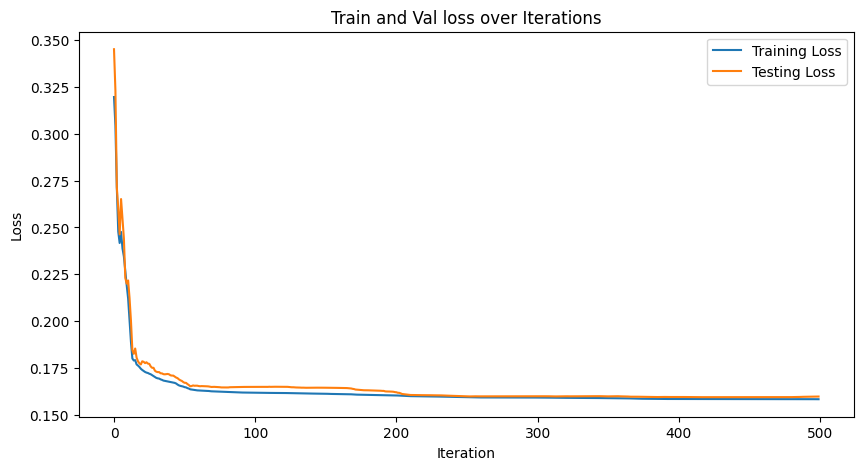

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(result["train_loss"], label='Training Loss')
plt.plot(result["test_loss"], label='Testing Loss')
plt.title('Train and Val loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model_Kan.eval()
with torch.no_grad():
    test_outputs = model_Kan(dataset['test_input'])
    test_mae = loss_fn(test_outputs, dataset['test_label'].view(-1, 1))

In [19]:
model_Kan.eval()
with torch.no_grad():
    test_outputs = model_Kan(dataset['test_input'])
    test_mae = loss_fn(test_outputs, dataset['test_label'].view(-1, 1))
    test_r2 = r2_score(dataset['test_label'].numpy(), test_outputs.numpy())

print(f"Test MAE for KAN: {test_mae.item()}")
print(f"Test R² score for KAN: {test_r2}")

Test MAE for KAN: 0.030804237350821495
Test R² score for KAN: 0.8380376015357536


In [20]:
result['train_loss'][-1]


array(0.15823185, dtype=float32)